# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# Enable GPU

In [ ]:
# # GPU enable
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

# Import Librarys

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import torch
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
import PIL
from sklearn.metrics import confusion_matrix , classification_report
from keras.callbacks import EarlyStopping
from PIL import Image
from keras.models import Model
from keras.applications import ResNet50
from keras.applications.vgg16 import VGG16

# Utility Function
### acc_loss_curve
### confusion matrix
### test_acc_with_img

In [ ]:
# accuracy and loss curve function
def plt_curve(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
def cnf_matrix(y_actual, y_pred, name):
  cm = confusion_matrix(y_actual, y_pred)
  plt.figure(figsize = (12, 10))
  # cm = pd.DataFrame(cm , index = [i for i in classes_] , columns = [i for i in classes_])
  sns.heatmap(cm, linecolor='white', cmap='viridis', linewidth=1, annot=True, fmt='')
  plt.title('Confusion Matrix '+name, size=20)
  plt.xlabel('Predicted Labels', size=14)
  plt.ylabel('Actual Labels', size=14)
  plt.show()
  print("Classification Report \n",classification_report(y_actual, y_pred)) 

# cnf_matrix(y_test, np.argmax(y_preds, axis=1), "")

In [ ]:
def test_acc_with_img(model, x_test, img):
  image=PIL.Image.open(img)
  image=image.resize((28,28))
  img=x_test[1]
  img=np.array(image).reshape(-1,28,28,3)
  result=model.predict(img)
  # print(result[0])
  result=result.tolist()
  max_prob=max(result[0])
  class_ind=result[0].index(max_prob)
  print(classes[class_ind])

def test_acc_with_img_util(model):
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/akiec.jpg")
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/bcc.jpg")
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/bkl.jpg")
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/df.jpg")
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/mel.jpg")
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/nv.jpg")
  test_acc_with_img(model, "/content/drive/MyDrive/testing image/vasc.jpg")


# Read Data

In [ ]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path='/content/drive/MyDrive/hmnist_28_28_RGB.csv'
df = pd.read_csv(path)
df.head()
# print(len(df))

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

# Split : Train_ratio, Test_ratio

8012
2003
[4 2 6 0 1 5 3]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


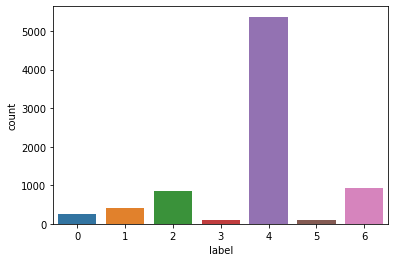

In [ ]:
fractions=np.array([0.8, 0.2])
df = df.sample(frac=1)
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

print(len(train_set))
print(len(test_set))
print(df.label.unique())

x_train = train_set.drop(columns=['label'])
y_train = train_set['label']

x_test = test_set.drop(columns=['label'])
y_test = test_set['label']



# columns = list(x_train)
# print(len(columns))

sns.countplot(y_train)


# num=random.randint(0,8000)
# plt.imshow(x_train[0].reshape(28,28,3))
# plt.title("Random image from training data")
# plt.show()

# # num=random.randint(0,8000)
# plt.imshow(x_train[1].reshape(28,28,3))
# plt.title("Random image from training data")
# plt.show()

# # num=random.randint(0,8000)
# plt.imshow(x_train[2].reshape(28,28,3))
# plt.title("Random image from training data")
# plt.show()


In [ ]:
  #normalize
def normalize(x_train, x_test):
    x_train = x_train/255.0
    x_test = x_test/255.0

# Oversampling/Undersampling x,y

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


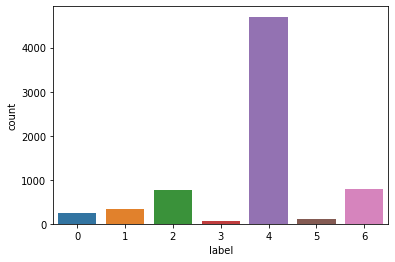

In [ ]:
sns.countplot(y_train)

In [ ]:
def oversample(x, y):
  x,y  = RandomOverSampler().fit_resample(x,y)
  return [x,y] 

In [ ]:
def undersample(x, y):
  x,y  = RandomUnderSampler().fit_resample(x,y)
  return [x,y] 

In [ ]:
# sns.countplot(y_train)

# 1. CNN on imbalance data 80/20
### early_stopping, 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 1.4590 - accuracy: 0.5755
Epoch 1: val_accuracy improved from -inf to 0.10334, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val/val_acc: 0.10334-val_loss: 3.46921-epoch: 01.h5
63/63 [==============================] - 10s 30ms/step - loss: 1.4590 - accuracy: 0.5755 - val_loss: 3.4692 - val_accuracy: 0.1033
Epoch 2/50
60/63 [===========================>..] - ETA: 0s - loss: 1.0126 - accuracy: 0.7177
Epoch 2: val_accuracy did not improve from 0.10334
63/63 [==============================] - 1s 10ms/step - loss: 1.0070 - accuracy: 0.7182 - val_loss: 6.1673 - val_accuracy: 0.0999
Epoch 3/50
62/63 [============================>.] - ETA: 0s - loss: 0.8291 - accuracy: 0.7463
Epoch 3: val_accuracy did not improve from 0.10334
63/63 [==============================] - 1s 10ms/step - loss: 0.8298 - accuracy: 0.7456 - val_loss: 6.3749 - val_accuracy: 0.0339
Epoch 4/50
61/63 [============================>.] - 

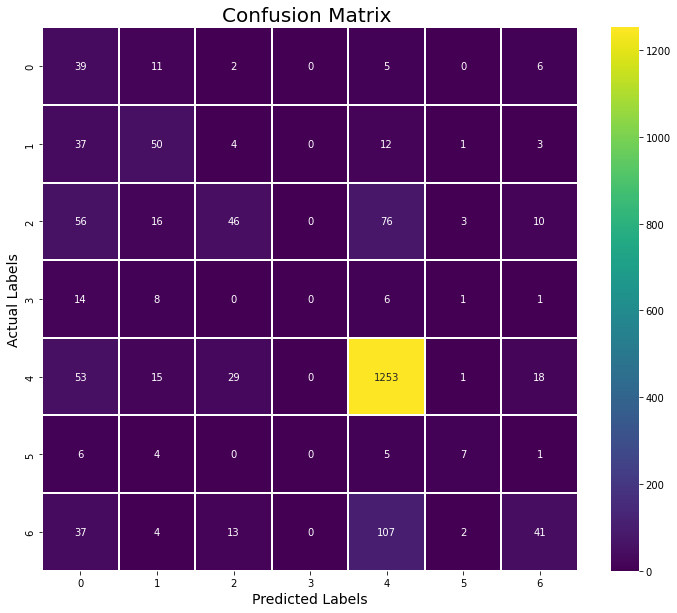

Classification Report 
               precision    recall  f1-score   support

           0       0.16      0.62      0.26        63
           1       0.46      0.47      0.47       107
           2       0.49      0.22      0.31       207
           3       0.00      0.00      0.00        30
           4       0.86      0.92      0.88      1369
           5       0.47      0.30      0.37        23
           6       0.51      0.20      0.29       204

    accuracy                           0.72      2003
   macro avg       0.42      0.39      0.37      2003
weighted avg       0.72      0.72      0.70      2003



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

# model.summary()

#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Raw CNN final/jan_15_test_as_val/val_acc: {val_accuracy:.05f}-val_loss: {val_loss:.05f}-epoch: {epoch:02d}.h5",
                                                  monitor='val_accuracy', mode='max',
                                                 verbose=1, save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=5,
                                                  restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])

# reshape to image
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

x_train = x_train/255.0
x_test = x_test/255.0

history = model.fit(x_train,
                    y_train,
                    # validation_split = 0.2,
                    validation_data = (x_test, y_test),
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[checkpoint, early_stopping])


print(model.evaluate(x_test, y_test))
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)

cnf_matrix(y_test, np.argmax(y_preds, axis=1), "")


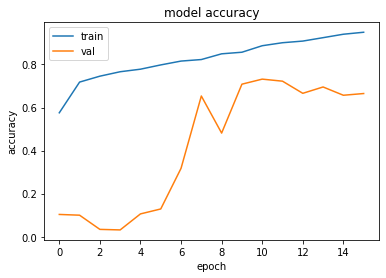

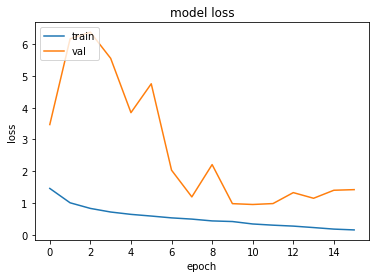

In [ ]:
plt_curve(history)

# 3. CNN on Augmented data with dropout 80/20
### Add more data : Data augmentation, 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50


<ipython-input-64-4caaf9b15b33>:63: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


63/63 [==============================] - ETA: 0s - loss: 1.7278 - accuracy: 0.4733
Epoch 1: val_accuracy improved from -inf to 0.55816, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation/val_acc: 0.55816-val_loss: 1.44449-epoch: 01.h5
63/63 [==============================] - 6s 70ms/step - loss: 1.7278 - accuracy: 0.4733 - val_loss: 1.4445 - val_accuracy: 0.5582
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 1.2305 - accuracy: 0.6500
Epoch 2: val_accuracy improved from 0.55816 to 0.65502, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation/val_acc: 0.65502-val_loss: 1.09332-epoch: 02.h5
63/63 [==============================] - 4s 66ms/step - loss: 1.2305 - accuracy: 0.6500 - val_loss: 1.0933 - val_accuracy: 0.6550
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 1.0361 - accuracy: 0.6898
Epoch 3: val_accuracy improved from 0.65502 to 0.67349, saving model to /content/drive/MyDrive

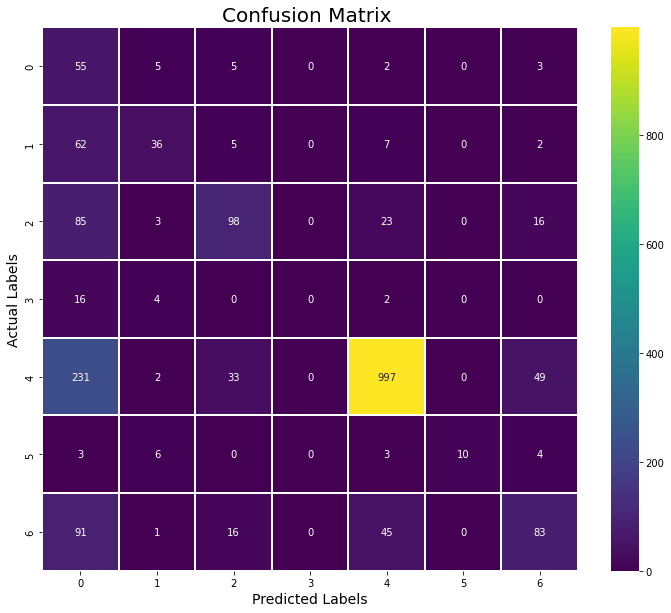

Classification Report 
               precision    recall  f1-score   support

           0       0.10      0.79      0.18        70
           1       0.63      0.32      0.43       112
           2       0.62      0.44      0.51       225
           3       0.00      0.00      0.00        22
           4       0.92      0.76      0.83      1312
           5       1.00      0.38      0.56        26
           6       0.53      0.35      0.42       236

    accuracy                           0.64      2003
   macro avg       0.54      0.43      0.42      2003
weighted avg       0.79      0.64      0.69      2003



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

# model.summary()

#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation/val_acc: {val_accuracy:.05f}-val_loss: {val_loss:.05f}-epoch: {epoch:02d}.h5",
                                                  monitor='val_accuracy', mode='max',
                                                 verbose=1, save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])

x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

# create the data generator
datagen = ImageDataGenerator(
    rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# # use the generator to augment the training data
# history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=50)

# fit the data generator on the training data
datagen.fit(x_train)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    # validation_split = 0.2,
                    validation_data = (x_test, y_test),
                    epochs = 50,
                    shuffle=True,
                    callbacks=[checkpoint, early_stopping])

print(model.evaluate(x_test, y_test))
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)

cnf_matrix(y_test, np.argmax(y_preds, axis=1), "")

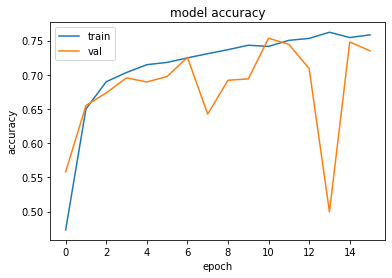

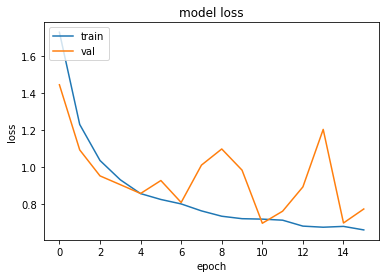

In [ ]:
plt_curve(history)

# 4. CNN using Regularization R1 on aug + dropout 80/20 ***
### augmentation, Regularization L1

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


63/63 [==============================] - ETA: 0s - loss: 15.7554 - accuracy: 0.4387
Epoch 1: val_accuracy improved from -inf to 0.05192, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation_l2r/val_acc: 0.05192-val_loss: 13.44215-epoch: 01.h5
63/63 [==============================] - 8s 83ms/step - loss: 15.7554 - accuracy: 0.4387 - val_loss: 13.4422 - val_accuracy: 0.0519
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 10.8781 - accuracy: 0.6589
Epoch 2: val_accuracy improved from 0.05192 to 0.66350, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation_l2r/val_acc: 0.66350-val_loss: 9.03681-epoch: 02.h5
63/63 [==============================] - 4s 67ms/step - loss: 10.8781 - accuracy: 0.6589 - val_loss: 9.0368 - val_accuracy: 0.6635
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 7.5674 - accuracy: 0.6875
Epoch 3: val_accuracy improved from 0.66350 to 0.68747, saving model to /content

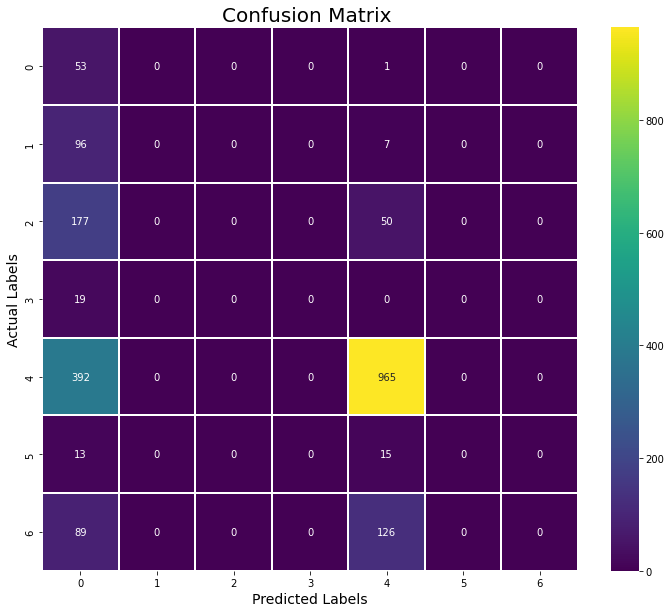

Classification Report 
               precision    recall  f1-score   support

           0       0.06      0.98      0.12        54
           1       0.00      0.00      0.00       103
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00        19
           4       0.83      0.71      0.77      1357
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00       215

    accuracy                           0.51      2003
   macro avg       0.13      0.24      0.13      2003
weighted avg       0.56      0.51      0.52      2003



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
l2r = tf.keras.regularizers.l1(0.001)

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(64,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

# model.summary()

#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation_l2r/val_acc: {val_accuracy:.05f}-val_loss: {val_loss:.05f}-epoch: {epoch:02d}.h5",
                                                  monitor='val_accuracy', mode='max',
                                                 verbose=1, save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])

x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

# create the data generator
datagen = ImageDataGenerator(
    rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# # use the generator to augment the training data
# history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=50)

# fit the data generator on the training data
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    # validation_split = 0.2,
                    validation_data = (x_test, y_test),
                    epochs = 50,
                    shuffle=True,
                    callbacks=[checkpoint, early_stopping])

print(model.evaluate(x_test, y_test))
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)

cnf_matrix(y_test, np.argmax(y_preds, axis=1), "")



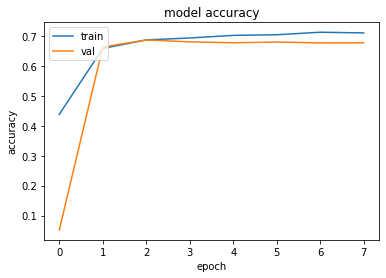

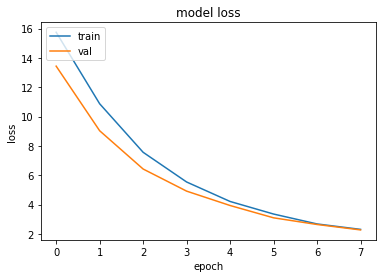

In [ ]:
plt_curve(history)

In [ ]:
model.save("/content/drive/MyDrive/Raw CNN final/best_models/val_acc_0.9412.h5")

In [ ]:
# model.save('/content/drive/MyDrive/best_models/best_model.h5')
# model.load_weights('/content/drive/MyDrive/Raw CNN final/best_models/best_model_original.h5') #***
# model.load_weights('/content/drive/MyDrive/best_model_1.h5')
# model.load_weights('/content/drive/MyDrive/saved_models/weight-improved-48-1.00.hdf5')
# model.load_weights('/content/drive/MyDrive/Raw CNN final/best_models/val_acc_0.9412.h5')
# model.load_weights('/content/drive/MyDrive/Raw CNN final/jan_11/val_acc: 1.00000-val_loss: 0.00212-epoch: 108.h5')
model.load_weights('/content/drive/MyDrive/Raw CNN final/jan_15_test_as_val/val_acc: 0.75686-val_loss: 1.42562-epoch: 26.h5')

# 5. CNN using Regularization R2 on aug + dropout 80/20 ***
### augmentation, Regularization L2

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


63/63 [==============================] - ETA: 0s - loss: 2.6548 - accuracy: 0.4224
Epoch 1: val_accuracy improved from -inf to 0.63854, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation_l2r/val_acc: 0.63854-val_loss: 2.24126-epoch: 01.h5
63/63 [==============================] - 6s 75ms/step - loss: 2.6548 - accuracy: 0.4224 - val_loss: 2.2413 - val_accuracy: 0.6385
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 2.0486 - accuracy: 0.6593
Epoch 2: val_accuracy improved from 0.63854 to 0.63904, saving model to /content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation_l2r/val_acc: 0.63904-val_loss: 1.96500-epoch: 02.h5
63/63 [==============================] - 4s 68ms/step - loss: 2.0486 - accuracy: 0.6593 - val_loss: 1.9650 - val_accuracy: 0.6390
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 1.8072 - accuracy: 0.6952
Epoch 3: val_accuracy improved from 0.63904 to 0.67049, saving model to /content/drive

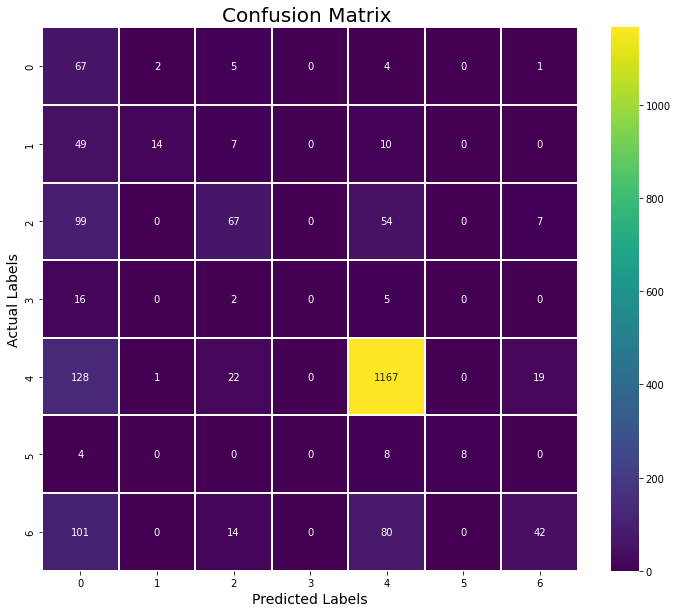

Classification Report 
               precision    recall  f1-score   support

           0       0.14      0.85      0.25        79
           1       0.82      0.17      0.29        80
           2       0.57      0.30      0.39       227
           3       0.00      0.00      0.00        23
           4       0.88      0.87      0.88      1337
           5       1.00      0.40      0.57        20
           6       0.61      0.18      0.27       237

    accuracy                           0.68      2003
   macro avg       0.58      0.40      0.38      2003
weighted avg       0.77      0.68      0.69      2003



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
l2r = tf.keras.regularizers.l2(0.001)

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', kernel_regularizer=l2r))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(64,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu', kernel_regularizer=l2r))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

# model.summary()

#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Raw CNN final/jan_15_test_as_val_augmentation_l2r/val_acc: {val_accuracy:.05f}-val_loss: {val_loss:.05f}-epoch: {epoch:02d}.h5",
                                                  monitor='val_accuracy', mode='max',
                                                 verbose=1, save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])

x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

# create the data generator
datagen = ImageDataGenerator(
    rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# # use the generator to augment the training data
# history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=50)

# fit the data generator on the training data
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    # validation_split = 0.2,
                    validation_data = (x_test, y_test),
                    epochs = 50,
                    shuffle=True,
                    callbacks=[checkpoint, early_stopping])

print(model.evaluate(x_test, y_test))
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)

cnf_matrix(y_test, np.argmax(y_preds, axis=1), "")



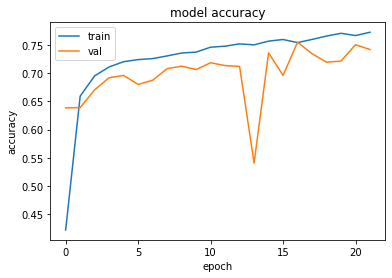

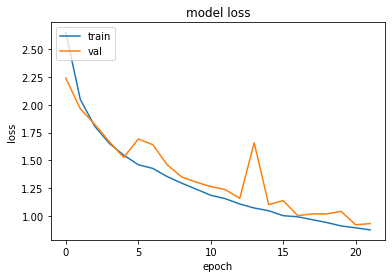

In [ ]:
plt_curve(history)

In [ ]:
model.save("/content/drive/MyDrive/Raw CNN final/best_models/val_acc_0.9412.h5")

In [ ]:
# model.save('/content/drive/MyDrive/best_models/best_model.h5')
# model.load_weights('/content/drive/MyDrive/Raw CNN final/best_models/best_model_original.h5') #***
# model.load_weights('/content/drive/MyDrive/best_model_1.h5')
# model.load_weights('/content/drive/MyDrive/saved_models/weight-improved-48-1.00.hdf5')
# model.load_weights('/content/drive/MyDrive/Raw CNN final/best_models/val_acc_0.9412.h5')
# model.load_weights('/content/drive/MyDrive/Raw CNN final/jan_11/val_acc: 1.00000-val_loss: 0.00212-epoch: 108.h5')
model.load_weights('/content/drive/MyDrive/Raw CNN final/jan_15_test_as_val/val_acc: 0.75686-val_loss: 1.42562-epoch: 26.h5')